# Numeric Python : PCA & SVD

    Before we start: >>> conda install numpy, matplotlib, pandas

## Scientific Programming in Python

- open source extension
- "replaces" MATLAB: it is the modern variant, it consists of a couple of modules
- it is faster
- it needs less memory
- array based calculation
- implemented multi-dimensional arrays
- improved for scientific computation

<img src="img/matlab_python_vergleich.png" title="Compairison Matlab with Python modules"/>
Sources:

1. https://www.python-kurs.eu/numpy.php
2. https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
3. http://cs231n.github.io/python-numpy-tutorial/

## Basic 'Vocabulary' in Numpy

Try out!

### Basic algebraic operations

- addition
- subtraction
- multiplication
- division
    - for Matrix-Matrix, Matrix-Vector, Vector-Vector


- scalar product (inner product)
- transpose
- inverse

Matrix filler
- numpy.zeros((x,y))
- numpy.ones((x,y))
- numpy.full((x,y),z)
- numpy.eye(x) # pun naming on eye and 'i' in identity matrix...
- numpy.random.random((x.y))

How do you generate a 3x3 matrix with random integers?

In [ ]:
import numpy as np
from numpy.linalg import inv

# Standard matrix declaration

Matrix = np.array([[1,2,3],[4,5,6]])

# Random matrix with defined integers
A = np.random.randint(5, size=(3,3))
B = np.random.randint(-5,5, size=(3,3))
v = np.random.randint(10, size=(1,3))
w = np.random.randint(10, size=(3,1))
vv = np.random.randint(10, size=(1,3))

print('Matrix : \n',Matrix,'\n')
print('A : \n',A,'\n')
print('B : \n',B,'\n')
print('v : \n',v,'\n')
print('w : \n',w,'\n')
print('ww : \n',vv,'\n')

In [ ]:
print('add : \n',A+B,'\n')
print('subs : \n',A-B,'\n')
print('mult : \n',A*B,'\n') # Attention! This is a elementwise multiplication, not the 'standard' matrix multiplication!
print('mult : \n',A.dot(B),'\n') 
print('div : \n',A/B,'\n')
print('inner product v*w: \n',v.dot(w),'\n')
print('inner product w*vv : \n',w.dot(vv),'\n')
print('transpose : \n',A.transpose(),'\n')
print('transpose : \n',A.T,'\n') # alternative and shorter transpose
print('inverse : \n',inv(A),'\n')


print('zero matrix : \n',np.zeros((3,3)),'\n')
print('ones matrix : \n',np.ones((3,3)),'\n')
print('full matrix : \n',np.full((3,3),10),'\n')
print('identity : \n',np.eye(3,3),'\n')
print('matrix with random float numbers : \n',np.random.random((3,3)),'\n')

In [ ]:
# matrix slicing
a = np.arange(15).reshape(3, 5) # generate a 3x5 matrix
b = a[:2, 1:3] # slice matrix: first and second row, second and third column
print(a)
print(b)
print(b[0,1]) # pick element: first index row, second index column

## Principal Component Analysis

Data taken from https://archive.ics.uci.edu/ml/datasets/Iris

Source for PCA https://plot.ly/ipython-notebooks/principal-component-analysis/

The main question tackling the idea of PCA might be which vector would most closely reconstruct the original data set (= matrix). As you know from the lectures, PCA is used for structuring large data sets, extracting the relevant information from it, and making visible the 'hidden' variables, that is the best fitting correlations between variables.

Steps to take for a full PCA:
1. Take the whole data set (without the labels)
2. Compute the mean vector
3. Compute the covariance matrix
4. Compute eigenvectors and the corresponding eigenvalues
5. Pick the eigenvectors with the largest eigenvalues to form a new matrix
6. Use this eigenvector matrix to transform the samples into a new subspace

What we do __different__ than in the lecture: Here we are stardardizing the data as an additional step. It depends on the data, whether it needs to be standardized or not. If we were measuring on different scales, standardization would make sense. Here we are doing it for the compairison between both approaches PCA and SVD.


In [32]:
import numpy as np
import pandas as pd

# open raw data
raw_data = pd.read_csv(filepath_or_buffer='data/iris.data', header=None, sep=',')

raw_data.columns=['Sepalum_Länge','Sepalum_Breite','Blüten-Länge', 'Blüten-Breite','Kategorie']
raw_data.dropna(how="all", inplace=True)

# display data in table
raw_data.tail()

In [ ]:
# slice the raw data into the matrix X and the (category) vector y
X = raw_data.ix[:,0:4].values
y = raw_data.ix[:,4].values

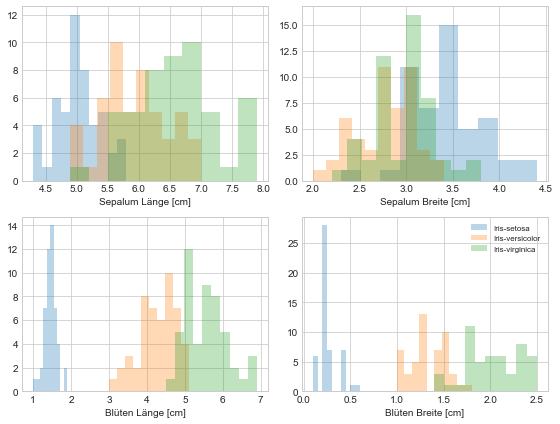

In [34]:
from matplotlib import pyplot as plt
import math

# display chart with the matrix values
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virginica'}

feature_dict = {0: 'Sepalum Länge [cm]',
                1: 'Sepalum Breite [cm]',
                2: 'Blüten Länge [cm]',
                3: 'Blüten Breite [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

### Covariance Matrix

__Q: How large is our sample data covariance matrix?__

_A: It is a 4x4 covariance matrix._

We include an additional step here, which is standardization. It wasn't discussed in the lectures yet.

In [35]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Recall the formula for calculation the covariance matrix _cov_:

$
cov(x,y) = \frac{1}{n - 1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$

with more than two variables, this formula might look different:

$
cov(a,b,x,y) = \frac{1}{n - 1}((X - \bar{x})^{T}(X - \bar{x}))
$

In our case, there are 4 variables, let's call them a,b,x,y. The second formula must be applied, since there are more than two variables. This formula is taken from the source at the beginning of the PCA section.

In [36]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

For the next step, __Eigendecomposition__, eigenvectors and eigenvalues are needed.

__Q: What do eigenvectors and eigenvalues look like?__

_A: Eigenvectors are 'summarized' as a 4x4 matrix; Eigenvalues as a 4x1 vector! Basically, you have a matrix of eigenvectors and a vector of eigenvalues._

In [37]:
# Alternatively, numpy has a cov() function for the covariance matrix. 
# Thus, the formula and the implementation of the formula are scoped by this function.
cov_mat_alt = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat_alt)

# Derive eigenvalues and eigenvectors with the eig() function: np.linalg.eig(cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

### Correlation Matrix

The correlation matrix as another way to perform eigendecomposition. It can be used alternatively to PCA or SVD.

The correlation matrix wasn't discussed in the lectures.

In [ ]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

## Singular Value Decomposition

In [ ]:
u,s,v = np.linalg.svd(X_std.T)
print(u)

## Reducing the dimensions

The following step is necessary in order to reduce the dimensions, that is picking the most promising eigenvector(s) and dropping the ones with the least information. In our example, wie take _ __k__ _ = 2 eigenvectors. These vectors will feature the new subspace.

__Q: Have a look at the eigenvectors. Which ones do we pick?__

_ A: We pick those ones, which have the highest value. The higher the value, the higher also the correlation between two variables._

In [38]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

Last step:

Use the 4x2 dimensional matrix to transform our sample data to the new subspace $Y = X  \times  W$, where $Y$ is a 150x2 matrix.

In [39]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Build the new subspace $Y$.

In [40]:
Y = X_std.dot(matrix_w)

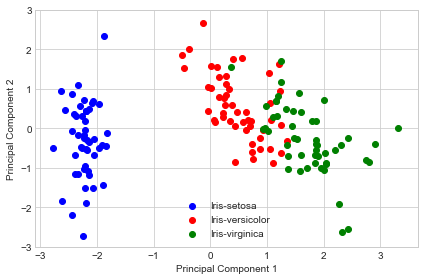

In [41]:
# Plot the results and enjoy the correlation between the information richest vectors. :)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

#### Further Readings
1. https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254
2. http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
3. https://pythonhosted.org/algopy/examples/covariance_matrix_computation.html